In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [24]:
df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [25]:
# Check dataset info and identify missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [26]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [31]:
#Fill missing age values with the median age
age_median = df['age'].median()

df['age'] = df['age'].fillna(age_median, inplace = True)
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,None,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,None,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,None,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,None,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,None,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,None,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,None,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,None,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,None,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,None,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [28]:
#Describe summary statistics for numeric columns
df.describe()

,survived,pclass,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208
std,0.486592,0.836071,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200


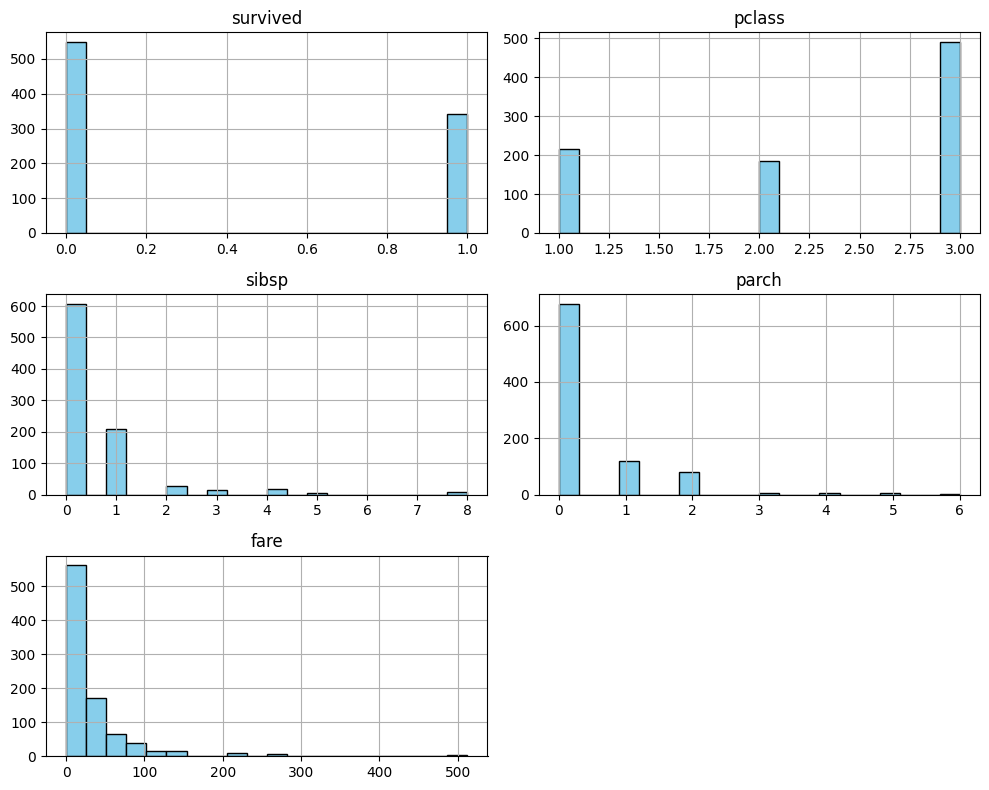

In [33]:
#Plot histograms for all numeric columns

df.hist(figsize=(10, 8), bins = 20,  color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


<Axes: ylabel='fare'>

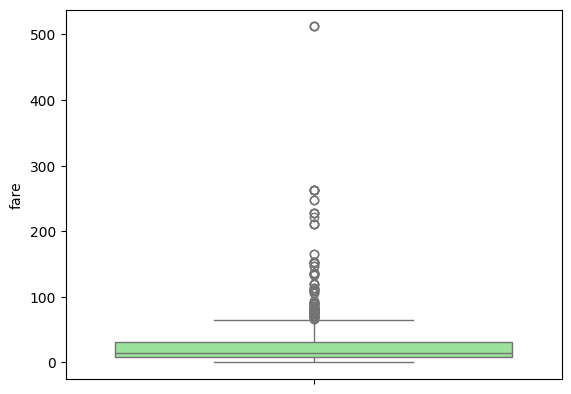

In [40]:
#Plot boxplots to detect outliers in fare and age.

sns.boxplot(y=df['fare'], color='lightgreen')


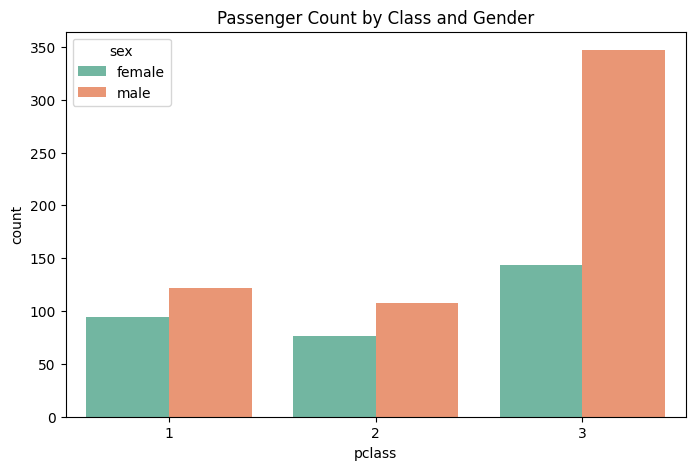

In [45]:
#Plot count of passengers by sex and class.

plt.figure(figsize=(8,5))
sns.countplot(x='pclass', hue='sex', data=df, palette='Set2')
plt.title('Passenger Count by Class and Gender')
plt.show()


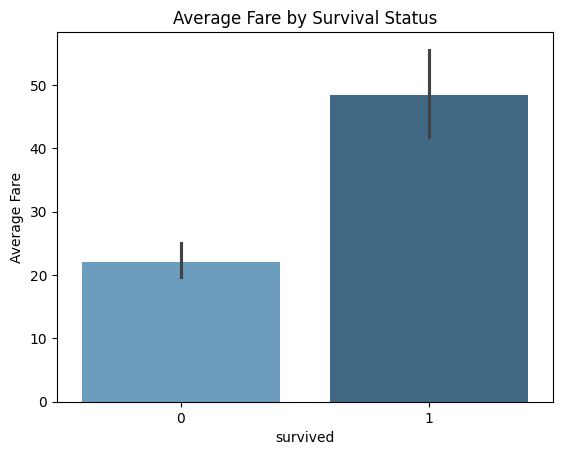

In [46]:
#Compare average fare by survival status (survived).

avg_fair = df.groupby('survived')['fare'].mean()

sns.barplot(x = 'survived', y = 'fare', data = df, palette='Blues_d')
plt.title('Average Fare by Survival Status')
plt.ylabel('Average Fare')
plt.show()
 

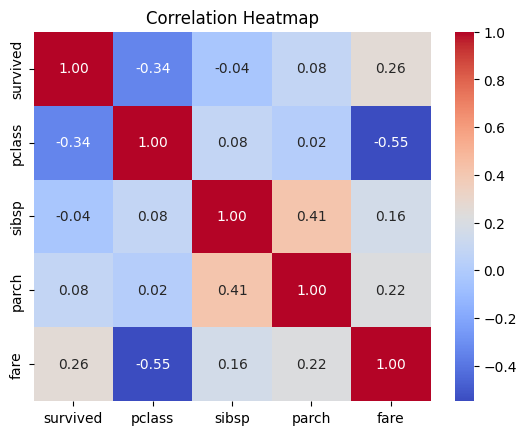

In [48]:
#Create a correlation heatmap and identify most related features

numeric_df = df.select_dtypes(include = 'number')

sns.heatmap(numeric_df.corr(), annot = True,  cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


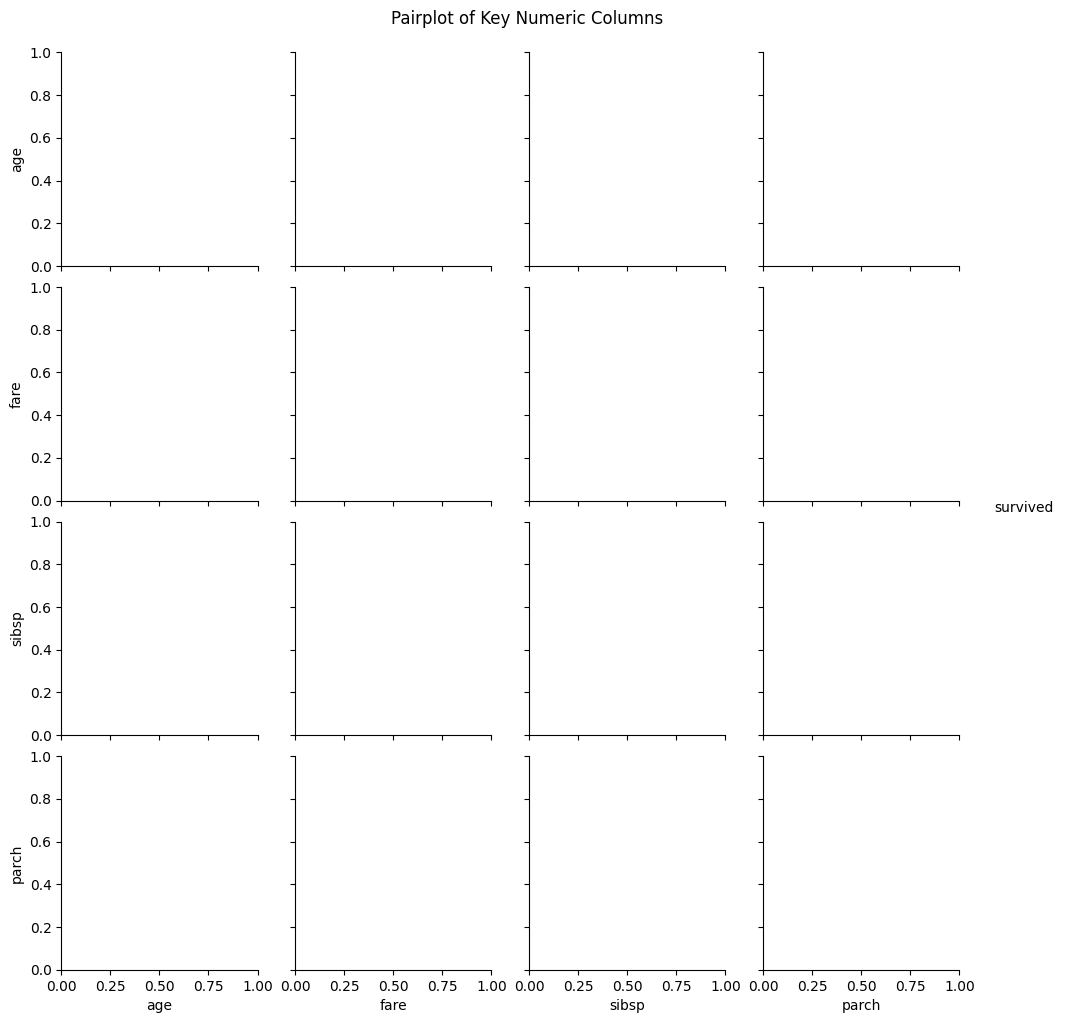

In [50]:
#Create a pairplot for key numeric columns to visualize patterns

cols = ['age', 'fare', 'sibsp', 'parch', 'survived']
sns.pairplot(df[cols].dropna(), hue='survived', palette='Set1')
plt.suptitle('Pairplot of Key Numeric Columns', y=1.02)
plt.show()
